在terminal中安装：`pip install pandas`，或直接在notebook中安装：`%pip install pandas`。
然后在文件中引进：`import pandas as pd`。

In [4]:
import pandas as pd

接着读取数据：`pd.read_csv('path-to-the-file.csv')`，如果需要，使用`sep`添加分隔符。

In [ ]:
df = pd.read_csv('../notes/self-study/dataset/set13_it1.csv',sep=',')

In [6]:
# 提供dataset的概要信息，包括每列的名称、数据类型、非空值数量和内存使用情况。
# 通过它检查是否有缺失值（查看Non-Null这一列），确认每列的数据类型是否正确（查看Dtype这一列）。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2363 non-null   int64  
 1   TradeValue      2363 non-null   float64
 2   RealmType       2363 non-null   object 
 3   Enclave         2363 non-null   object 
 4   LivingQuarters  2244 non-null   float64
 5   ParcelSize      2363 non-null   float64
 6   ParcelSizeUnit  2363 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 129.4+ KB


使用 `.head()` (前几行), `.tail()` (最后几行) 和 `.sample()` (随机某一行) 来展示默认五行的内容，也可以通过传参来指定数量：`df.head(10)`。

In [7]:
# 快速预览数据的内容和格式，看看数据长什么样。也可以用来检查数据是否正确加载，有无乱码。在结束数据清洗后，可以用它来确认前几行是否符合预期。
df.head()

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,147000.0,Meadowlands,Brightforge,766.0,9069.0,sqft
1,1,98000.0,GnomeBurough,Petalbridge,1033.0,4571.0,sqft
2,2,325624.0,Meadowlands,Silverglen,1662.0,10562.0,sqft
3,3,178000.0,Meadowlands,Brightforge,1332.0,9206.0,sqft
4,4,154900.0,Meadowlands,Thornfield,1033.0,7681.0,sqft


In [8]:
# 和head()类似，但关注数据的末尾。它可以用来查看数据集的完整性，确认末尾数据是否正常，并且在数据排序后检查最后几行是否符合预期。
df.tail(2)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
2361,2338,188000.0,Meadowlands,Brightforge,1304.0,10110.0,sqft
2362,2339,170000.0,Meadowlands,Sunspire,1073.0,11069.0,sqft


In [9]:
# 比head()和tail()更全面地预览数据，因为它随机选择，避免只看到开头或结尾。当怀疑数据分布不均匀时，可以用它来检查。
df.sample()

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
1894,1874,119000.0,Meadowlands,Dragonspire,963.0,9600.0,sqft


In [10]:
# 提供数值列的统计概要，包括计数、均值、标准差、最小值、最大值和分位数。
# 可以用它快速了解数据的统计特性，比如分布范围、集中趋势和离散程度。以及用来发现异常值（比如平均年龄是35岁，最大值却是120岁）。
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize
count,2363.000000,2363.000000,2244.000000,2363.000000
mean,1169.975032,181043.250491,1153.898396,9843.480771
std,675.071928,82398.823979,390.602425,7297.756555
min,0.000000,85.000000,256.000000,-15676.000000
25%,586.500000,129650.000000,866.000000,7226.500000
50%,1171.000000,160000.000000,1115.500000,9345.000000
75%,1751.500000,213000.000000,1338.000000,11475.000000
max,2339.000000,755000.000000,4339.000000,164660.000000


|数据|说明|计算方式|Pandas函数|
|--|--|--|--|
|count|数据集中非缺失值的数量（即有效数据的行数）|统计每列中非NaN的元素个数|`df['TradeValue'].count()`|
|mean|平均值，数据的中心趋势，对异常值(outliers)很敏感|所有值的总和除以值的个数：`sum(x) / n`|`df['TradeValue'].mean()`|
|std|标准差，衡量数据的离散程度（值越大数据越分散）|`sqrt(Σ(x - mean)² / (n-1))`，样本标准差|`df['TradeValue'].std()`|
|min|最小值，数据中的最低值|直接取列中的最小值|`df['TradeValue'].min()`|
|25%|第一四分位数（Q1），它是数据“较低部分”的代表值|把数据排序后，找到一个值，使得25%的数值低于它，75%的数值高于它|`df['TradeValue'].quantile(0.25)`|
|50%（median）|第二四分位数（Q2），它是数据的“中间值”，也就是中位数|数据排序后，50%的数值低于它，50%的数值高于它|`df['TradeValue'].median()`|
|75%|第三四分位数（Q3），它是数据“较高部分”的代表值|数据排序后，75%的数值低于它，25%的数值高于它|`df['TradeValue'].quantile(0.75)`|
|max|最大值，数据中的最高值|直接取列中的最大值|`df['TradeValue'].max()`|


In [11]:
# 使用 mode() 可以计算众数，即数据集中出现次数最多的值（或多个值），它反映数据的“最常见情况”。
# 一个数据集可能有一个或多个众数，也可能没有众数。它适用于任何类型的数据（数值、字符串等），不像均值和中位数那样只针对数值。
df['TradeValue'].mode()

0    135000.0
Name: TradeValue, dtype: float64

In [12]:
# 想要查看类别、种类，或者找重复项时，可以使用 unique() 来返回一个数组，其中会包含数据中某一列里的所有唯一值。
# 使用的时候必须指定 列 ，如果数据中有缺失值，那么NaN也会被当作一个值。
unique_values = df['Enclave'].unique()
print("The unique values are: ",unique_values)
print("The unique values in tatal: " ,len(unique_values))
print("The rows in total: ", len(unique_values))

The unique values are:  ['Brightforge' 'Petalbridge' 'Silverglen' 'Thornfield' 'Shadowmere'
 'Dragonspire' 'Mossheart' 'Mystvale' 'Sunspire' 'Crystalhollow'
 'Dreamweaver' 'Emberfall' 'Stormwatch' 'Wyverncliff' 'Wolfsbane'
 'Nighthaven' 'Riverbend' 'Duskwood' 'Stormhold' 'Glimmerwood'
 'glimmerwood' 'Ravenstone' 'Starfall' 'Windwhisper' 'Verdantia'
 'Cloudrest' 'PETALBRIDGE' 'Oakenshade' 'Dragonspires' 'SHADOWMERE'
 'Brightforges' 'ravenstone' 'DRAGONSPIRE' 'duskwood' 'STARFALL'
 'SUNSPIRE' 'windwhisper' 'petalbridge' 'Moonglade' 'emberfall'
 'wyverncliff' 'BRIGHTFORGE' 'EMBERFALL' 'SILVERGLEN' 'GLIMMERWOOD'
 'RAVENSTONE']
The unique values in tatal:  46
The rows in total:  46


可视化数据可以更直观的观察。<br>
在terminal中安装：`pip install matplotlib`，然后在文件中引进：`import matplotlib.pyplot as plt`。

In [13]:
import matplotlib.pyplot as plt

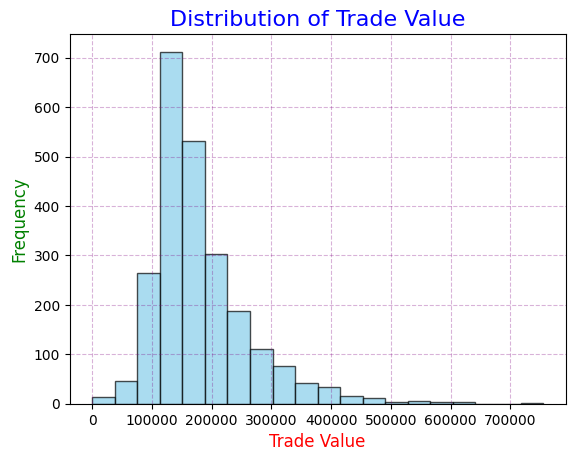

In [14]:
plt.hist(df['TradeValue'], bins=20, color='skyblue', edgecolor='black', alpha=0.7) # edgecolor为柱子边框颜色；alpha为透明度，取值区间 0-1。
plt.title('Distribution of Trade Value', fontsize=16, color='blue') # color 也可以使用十六进制(#FF5733)自定义
plt.xlabel('Trade Value', fontsize=12, color='red')
plt.ylabel('Frequency', fontsize=12, color='green')
plt.grid(True, linestyle='--', alpha=0.3, color='purple') # 添加背景网格线
plt.show()

可以使用 `loc()` 或 `iloc()` 来筛选数据。<br>
在数据分析中，筛选数据是为了着重关注某个感兴趣的部分，比如只看某个区域的房子，或只看价格超过某个数值的房子。<br>
还可以为可视化或统计做准备，即筛选出特定数据后，接着画图或计算均值。

`loc()` 是基于标签和条件进行筛选，适合按列名和逻辑条件来操作。

In [15]:
# 1. 筛选所有“Meadowlands”区域的房产
meadowlands = df.loc[df['RealmType'] == 'Meadowlands']
meadowlands.head(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,147000.0,Meadowlands,Brightforge,766.0,9069.0,sqft
2,2,325624.0,Meadowlands,Silverglen,1662.0,10562.0,sqft
3,3,178000.0,Meadowlands,Brightforge,1332.0,9206.0,sqft
4,4,154900.0,Meadowlands,Thornfield,1033.0,7681.0,sqft
5,5,111000.0,Meadowlands,Shadowmere,729.0,10215.0,sqft


In [16]:
# 2. 筛选交易价值超过20万且居住面积大于3000的房产
high_value_large = df.loc[(df['TradeValue'] > 200000) & (df['LivingQuarters'] > 3000)] # 条件要用括号括起来，多个条件之间用 &（且）、|（或）
high_value_large.head(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
102,102,755000.0,Meadowlands,Glimmerwood,3319.0,21535.0,sqft
360,357,745000.0,Meadowlands,Glimmerwood,3443.0,15623.0,sqft


In [17]:
# 3. 筛选“Meadowlands”区域且地块大小大于90000的房产，只显示名称和价格
meadowlands_large = df.loc[(df['RealmType'] == 'Meadowlands') & (df['ParcelSize'] > 90000), ['Enclave', 'TradeValue']] # 加上列名列表，只返回指定的列
print(meadowlands_large)

          Enclave  TradeValue
91    Windwhisper    277000.0
791   Windwhisper    302000.0
1025   Ravenstone    228950.0


`iloc()` 是基于整数位置进行筛选，适合按行号和列号来操作。

In [18]:
# 1. 提取前2行所有列
first_two = df.iloc[0:2] # 0:2表示第0行到第1行（不含第2行）
print(first_two)

   DI  TradeValue     RealmType      Enclave  LivingQuarters  ParcelSize  \
0   0    147000.0   Meadowlands  Brightforge           766.0      9069.0   
1   1     98000.0  GnomeBurough  Petalbridge          1033.0      4571.0   

  ParcelSizeUnit  
0           sqft  
1           sqft  


In [19]:
# 2. 提取所有行的前3列
first_three_cols = df.iloc[:, 0:3] # :表示所有行，0:3表示第0到第2列（不含第3列）
first_three_cols.head(6)

,DI,TradeValue,RealmType
0,0,147000.0,Meadowlands
1,1,98000.0,GnomeBurough
2,2,325624.0,Meadowlands
3,3,178000.0,Meadowlands
4,4,154900.0,Meadowlands
5,5,111000.0,Meadowlands


In [20]:
# 3. 提取第1到第2行，第2到第3列
subset = df.iloc[1:3, 2:4] # 1:3是第1到第2行，2:4是第2到第3列
print(subset)

      RealmType      Enclave
1  GnomeBurough  Petalbridge
2   Meadowlands   Silverglen


In [21]:
# 4. 提取最后一行，最后两列
last_row_last_two = df.iloc[-1:, -2:] # -1:表示最后一行，-2:表示最后两列
print(last_row_last_two)

      ParcelSize ParcelSizeUnit
2362     11069.0           sqft


根据之前运行 `head()` 和 `describe()`的结果，可以发现数据集存在一些问题。<br>
这个数据集有2363行，7列。<br>
**缺失值**：Non-Null` 列发现 LivingQuarters 有119个缺失值（其他列有2363行，LQ列只有2244行）。<br>
**异常值**：eValue 最小值为85，房产价格通常不该这么低。ParcelSize 最小值为-15676，但地块大小不可能为负数。<br>
**潜在问题**：1. RealmType 和 Enclave 的数据类型为string，这两列可能会存在拼写错误或大小写不一致的问题；2. ParcelSizeUnit 可能存在单位不一致的情况（sqft vs sqm）。

接下来，将按照以下步骤清理数据：
1. 检查和处理重复值（`duplicated()`, `drop_duplicates()`）；
2. 处理缺失值（`dropna()`）；
3. 检查和统一字符串格式（`unique()`, `str.lower()/str.upper()/str.capitalize()`, `str.replace()`），并修正不一致单位（ParcelSizeUnit）；
4. 移除异常值（比如负值或不合理的TradeValue和ParcelSize）；
5. 验证清理结果，并将清理后的数据保存为新的数据集。

第一步，使用 `df.duplicated().sum()` 检查共有多少行数据是重复的，接着使用 `df.drop_duplicates()` 删除掉重复的行，并将返回的新数据存储在新变量 `dfx` 中。

In [22]:
# 检查重复行
print("重复行数量:", df.duplicated().sum())

重复行数量: 23


In [23]:
# 删除重复行
dfx = df.drop_duplicates()
print("删除重复行后，数据行数:", len(dfx))

删除重复行后，数据行数: 2340


第二步，用 `df.dropna()` 删除所有包含缺失值的行。

In [24]:
# 删除包含缺失值的行
dfx = dfx.dropna()
print("删除缺失值后，数据行数:", len(dfx))
print(dfx.info())

删除缺失值后，数据行数: 2223
<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2223 non-null   int64  
 1   TradeValue      2223 non-null   float64
 2   RealmType       2223 non-null   object 
 3   Enclave         2223 non-null   object 
 4   LivingQuarters  2223 non-null   float64
 5   ParcelSize      2223 non-null   float64
 6   ParcelSizeUnit  2223 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 138.9+ KB
None


第三步，检查和统一字符串格式：<br>
用 `unique()` 检查RealmType、Enclave和ParcelSizeUnit的唯一值。<br>
用 `str.lower()` 统一大小写，防止拼写不一致（如“Glimmerwood” vs “glimmerwood”）。<br>
用 `str.replace()` 修正可能的拼写错误。

In [25]:
# 检查唯一值
print("RealmType 唯一值:", dfx['RealmType'].unique())
print("Enclave 唯一值:", dfx['Enclave'].unique())
print("ParcelSizeUnit 唯一值:", dfx['ParcelSizeUnit'].unique())

RealmType 唯一值: ['Meadowlands' 'GnomeBurough' 'AetherIsles' 'ArcaneMarket'
 'CitadelQuarter']
Enclave 唯一值: ['Brightforge' 'Petalbridge' 'Silverglen' 'Thornfield' 'Shadowmere'
 'Dragonspire' 'Mossheart' 'Mystvale' 'Sunspire' 'Crystalhollow'
 'Dreamweaver' 'Emberfall' 'Wyverncliff' 'Wolfsbane' 'Nighthaven'
 'Riverbend' 'Stormwatch' 'Duskwood' 'Stormhold' 'Glimmerwood'
 'glimmerwood' 'Ravenstone' 'Starfall' 'Windwhisper' 'Verdantia'
 'Cloudrest' 'PETALBRIDGE' 'Oakenshade' 'Dragonspires' 'SHADOWMERE'
 'Brightforges' 'ravenstone' 'DRAGONSPIRE' 'duskwood' 'STARFALL'
 'SUNSPIRE' 'windwhisper' 'petalbridge' 'Moonglade' 'emberfall'
 'wyverncliff' 'BRIGHTFORGE' 'EMBERFALL' 'SILVERGLEN' 'GLIMMERWOOD'
 'RAVENSTONE']
ParcelSizeUnit 唯一值: ['sqft' 'sqm']


从以上检查能发现：<br>
Enclave 列中有很多值存在大小写不同的问题，比如Starfall/STARFALL，并且还有单复数拼写错误，比如Brightforges/Brightforge，Dragonspires/Dragonspire。<br>
而 ParcelSizeUnit 列有两种单位，sqft 和 sqm。

In [26]:
# 先统一 Enclave 列的值的大小写
dfx['Enclave'] = dfx['Enclave'].str.lower()

# 再修正 Enclave 列的拼写错误
dfx['Enclave'] = dfx['Enclave'].str.replace('brightforges', 'brightforge')
dfx['Enclave'] = dfx['Enclave'].str.replace('dragonspires', 'dragonspire')
# 以及，将 ParcelSizeUnit 列的两种单位统一成 sqft 这一种 
dfx['ParcelSizeUnit'] = dfx['ParcelSizeUnit'].str.replace('sqm', 'sqft')

# 最后，检查修正完的结果
print("修正后 Enclave 唯一值:", dfx['Enclave'].unique())
print("修正后 ParcelSizeUnit 唯一值:", dfx['ParcelSizeUnit'].unique())

修正后 Enclave 唯一值: ['brightforge' 'petalbridge' 'silverglen' 'thornfield' 'shadowmere'
 'dragonspire' 'mossheart' 'mystvale' 'sunspire' 'crystalhollow'
 'dreamweaver' 'emberfall' 'wyverncliff' 'wolfsbane' 'nighthaven'
 'riverbend' 'stormwatch' 'duskwood' 'stormhold' 'glimmerwood'
 'ravenstone' 'starfall' 'windwhisper' 'verdantia' 'cloudrest'
 'oakenshade' 'moonglade']
修正后 ParcelSizeUnit 唯一值: ['sqft']


第四步，移除异常值。<br>
此处有两个不合理的值：TradeValue 列中最小值为85，但是房子不太可能卖这么便宜；ParcelSize 列中有负数值，但地块面积不可能为负数。

In [27]:
# 使用条件，将不合理的行直接删掉：假设房子售价至少大于500，且面积一定是正数。
dfx = dfx[(dfx['TradeValue'] >= 500) & (dfx['ParcelSize'] > 0)]
print("移除异常值后，数据行数:", len(dfx))

移除异常值后，数据行数: 2202


第五步，验证清理结果，并将清理完的数据保存为新的数据集。

In [28]:
# 最终数据概览
print("清理后的数据信息:")
print(dfx.info())
print("\n清理后的统计描述:")
print(dfx.describe())

# 保存清理后的数据
dfx.to_csv('../self-study/dataset/set13_it1_cleaned.csv', index=False)

清理后的数据信息:
<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2202 non-null   int64  
 1   TradeValue      2202 non-null   float64
 2   RealmType       2202 non-null   object 
 3   Enclave         2202 non-null   object 
 4   LivingQuarters  2202 non-null   float64
 5   ParcelSize      2202 non-null   float64
 6   ParcelSizeUnit  2202 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 137.6+ KB
None

清理后的统计描述:
                DI     TradeValue  LivingQuarters     ParcelSize
count  2202.000000    2202.000000     2202.000000    2202.000000
mean   1169.335150  181567.430064     1154.182561    9988.664908
std     673.790267   81523.525077      391.559154    7335.356924
min       0.000000   12789.000000      256.000000     175.586670
25%     583.250000  129862.500000      866.000000    7291.500000
50%    1169.50

之前已经画过一次图，接下来针对已经处理完的数据，再画一些以便观察。<br>
可以使用Matplotlib或Seaborn画图，但Seaborn画的图更美观，并且支持hue区分类别。<br>
使用可视化工具，能够更直观地探索数据，比如：<br><br>

条形图（Barplot）：用离散的条形（条形间有间隔）表示**分类数据**的计数或统计值（比如每个RealmType的房子数），适合**比较数量或均值**。<br>
直方图（Histogram）：用连续的条形（条形无缝连接）表示**数值数据**的分布（比如TradeValue的范围分布），适合查看数值变量的**频率分布**（集中在哪里，有没有偏态）。<br>
折线图（Lineplot）：适合展示**随时间或有序变量（x轴）的趋势**，比如“房价随年份变化”。但在此数据集中DI只是随机索引，没有实际意义，画出来的折现可能只是杂乱的波动。<br>
散点图（Scatterplot）：找变量关系（面积和房价），即某两种**数值**列的**相关性**。

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 条形图（Barplot）：统计每个RealmType的房子数量，观察哪个区域类型最常见。

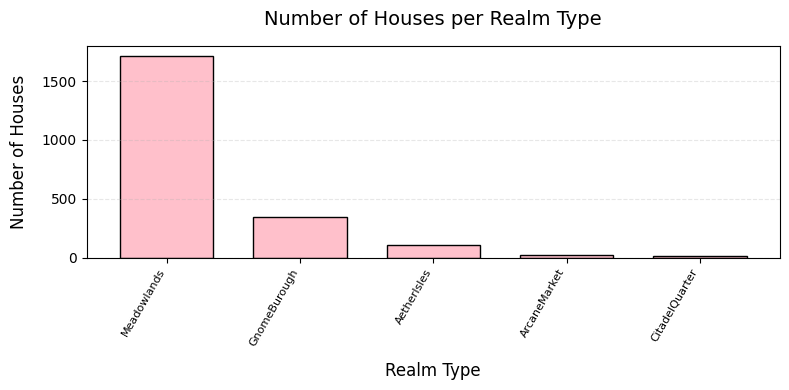

In [ ]:
# 计算每个RealmType的房子数量：使用value_counts()统计RealmType中每个类别的出现次数（比如meadowlands有多少房子）
realm_counts = dfx['RealmType'].value_counts()

plt.figure(figsize=(8, 4)) # 设置画布大小

# 用粉色条形图 
realm_counts.plot.bar(color='pink', edgecolor='black', width=0.7) # Matplotlib版本 # width条形宽度（0到1），避免太挤。
# sns.barplot(x=realm_counts.index, y=realm_counts.values, color='pink') # Seaborn版本

plt.xlabel('Realm Type', fontsize=12, labelpad=10)  # x轴标签，距离轴10单位
plt.ylabel('Number of Houses', fontsize=12, labelpad=10)  # y轴标签
plt.title('Number of Houses per Realm Type', fontsize=14, pad=15)  # 标题，距离图15单位

plt.xticks(rotation=60, ha='right', fontsize=8)  # x轴标签旋转60度 # ha='right': 标签对齐方式（horizontal alignment）
plt.yticks(fontsize=10)  # y轴刻度字体

plt.grid(axis='y', linestyle='--', alpha=0.3)  # y轴网格线

plt.tight_layout()  # 自动调整布局
plt.show()

1.1 条形图（Barplot）高级示例：RealmType平均房价<br>
estimator='mean': 计算平均值（可改sum或median）。<br>
errorbar=None: 不显示误差条（可选ci显示置信区间）。<br>
linewidth=1: 边框粗细。

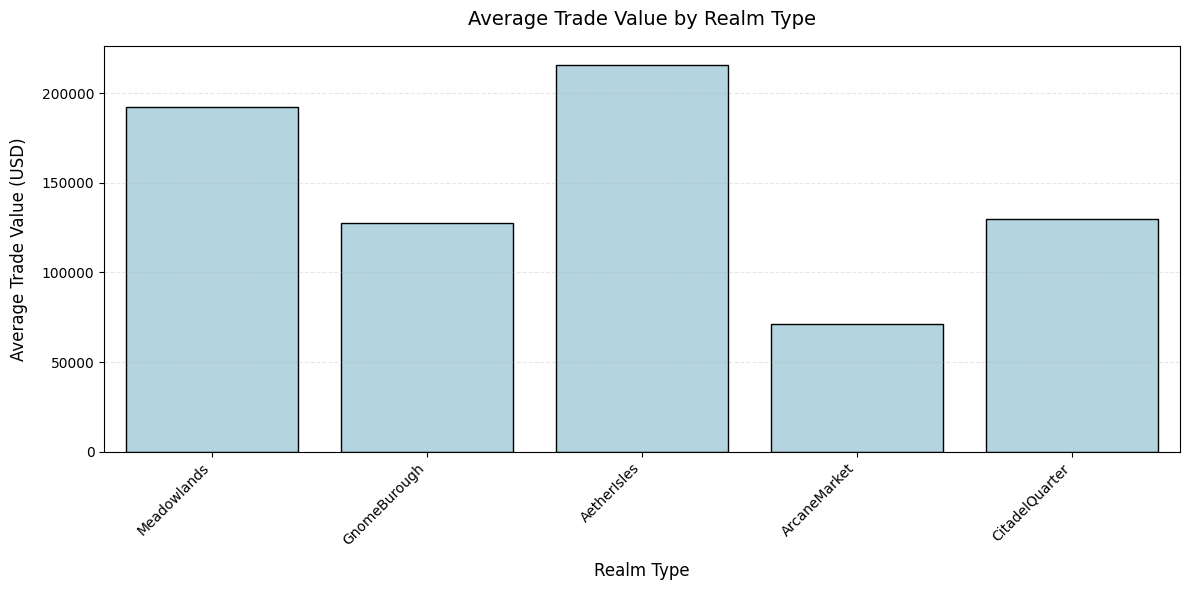

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dfx, x='RealmType', y='TradeValue', estimator='mean', color='lightblue', edgecolor='black', linewidth=1, errorbar=None)
plt.xlabel('Realm Type', fontsize=12, labelpad=10)
plt.ylabel('Average Trade Value (USD)', fontsize=12, labelpad=10)
plt.title('Average Trade Value by Realm Type', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

2. 直方图（Histogram）: 查看TradeValue（房价）的分布，看价格集中在哪。

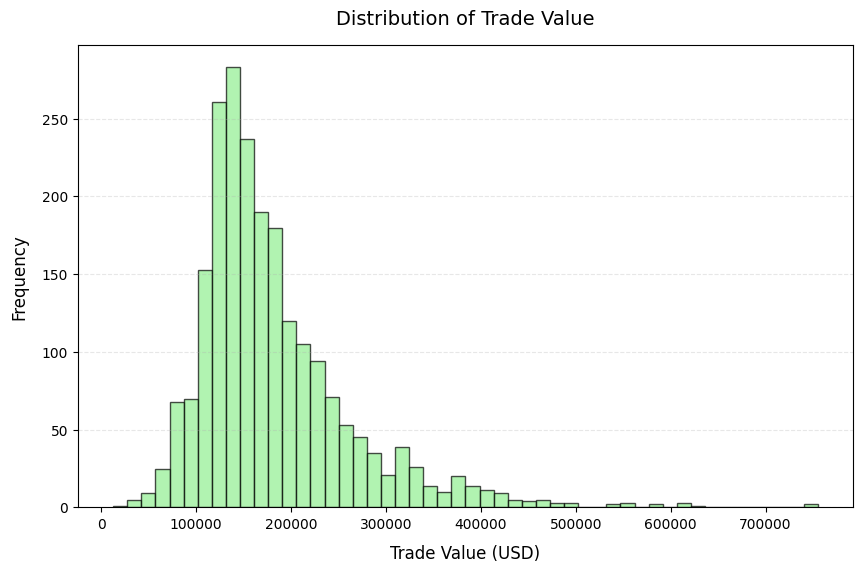

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(dfx['TradeValue'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7) # bins=50: 分成50个区间，控制条形数量（多则细腻，少则粗略）;alpha=0.7: 透明度（0到1）。
plt.xlabel('Trade Value (USD)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.title('Distribution of Trade Value', fontsize=14, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

3. 折线图（Lineplot）：观察TradeValue（房价）的趋势，按DI（数据索引）排序，看房价是否有规律变化。<br>
折线图适合展示随时间或有序变量（x轴）的趋势，比如“房价随年份变化”。但在此数据集中DI只是随机索引，没有实际意义，画出来的折现可能只是杂乱的波动。<br>

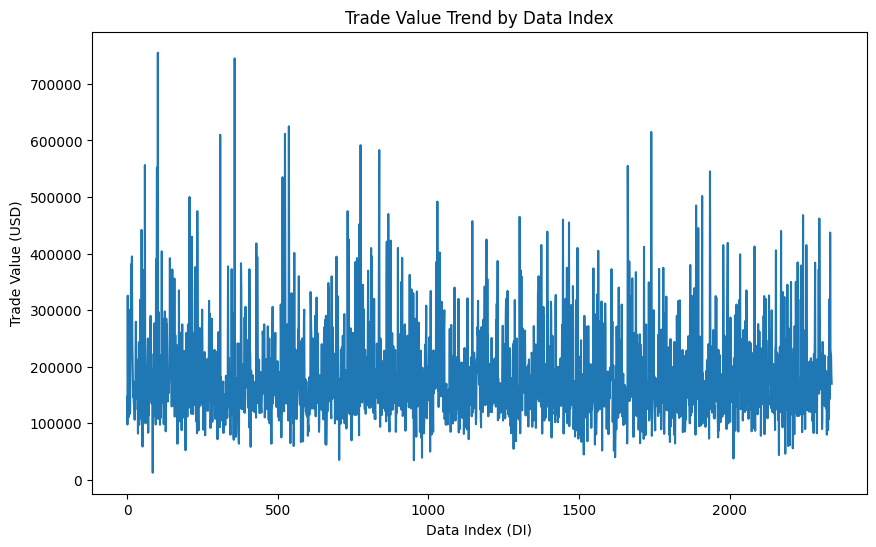

In [63]:
# 按DI排序并画折线图（但实际上DI本就是有序的，这行代码没有意义，只是示范之后画折线图时可以这样做，以保证图不会乱）
dfx_sorted = dfx.sort_values('DI')

plt.figure(figsize=(10, 6))

# dfx_sorted['TradeValue'].plot.line() # Matplotlib版本
sns.lineplot(data=dfx, x='DI', y='TradeValue', estimator='mean', errorbar=None) # Seaborn版本 # 如果DI重复，平均值能简化数据，展示趋势。但DI并不重复，所以estimator='mean'实际不起作用。
plt.xlabel('Data Index (DI)', fontsize=10)
plt.ylabel('Trade Value (USD)', fontsize=10)
plt.title('Trade Value Trend by Data Index', fontsize=12)
plt.show()

4. 散点图（Scatterplot）：探索LivingQuarters（居住面积）和TradeValue（房价）的关系，看面积是否影响房价。<br>
LivingQuarters和TradeValue都是数值，散点图适合看两者相关性。

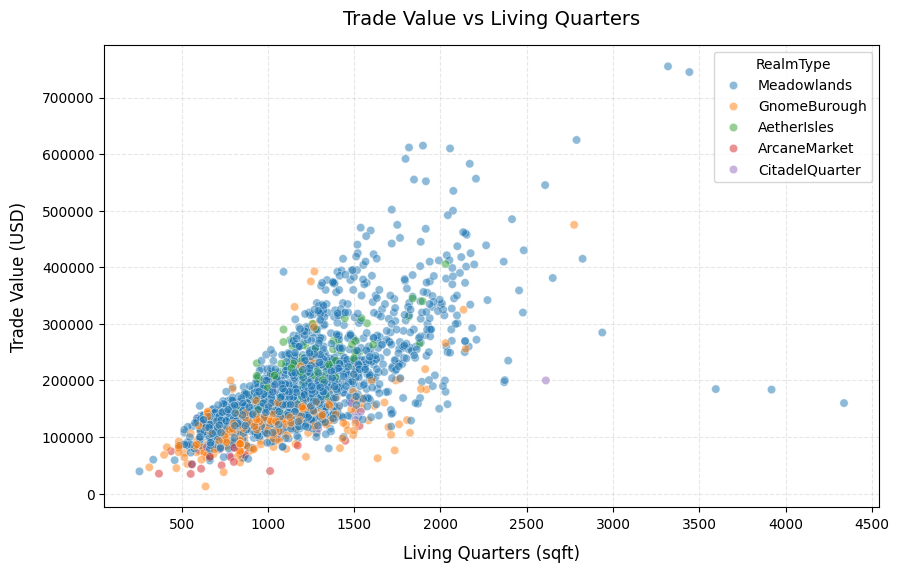

In [ ]:
plt.figure(figsize=(10, 6))
# plt.scatter(dfx['LivingQuarters'], dfx['TradeValue'], color='purple', alpha=0.5, s=50, edgecolor='black') # Matplotlib版本 # s:点的大小（像素）
sns.scatterplot(data=dfx, x='LivingQuarters', y='TradeValue', hue='RealmType', alpha=0.5) # Seaborn版本（带颜色区分RealmType）
plt.xlabel('Living Quarters (sqft)', fontsize=12, labelpad=10)
plt.ylabel('Trade Value (USD)', fontsize=12, labelpad=10)
plt.title('Trade Value vs Living Quarters', fontsize=14, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3) # grid=True: 网格线，True画xy轴
plt.show()

4.1 散点图（Scatterplot）高级示例：ParcelSize vs TradeValue<br>
hue='RealmType': 按区域类型着色。<br>
size='LivingQuarters': 点大小反映居住面积。<br>
palette='deep': 颜色方案（可选muted, bright）。<br>
legend='brief': 简洁图例（可选full或False）。

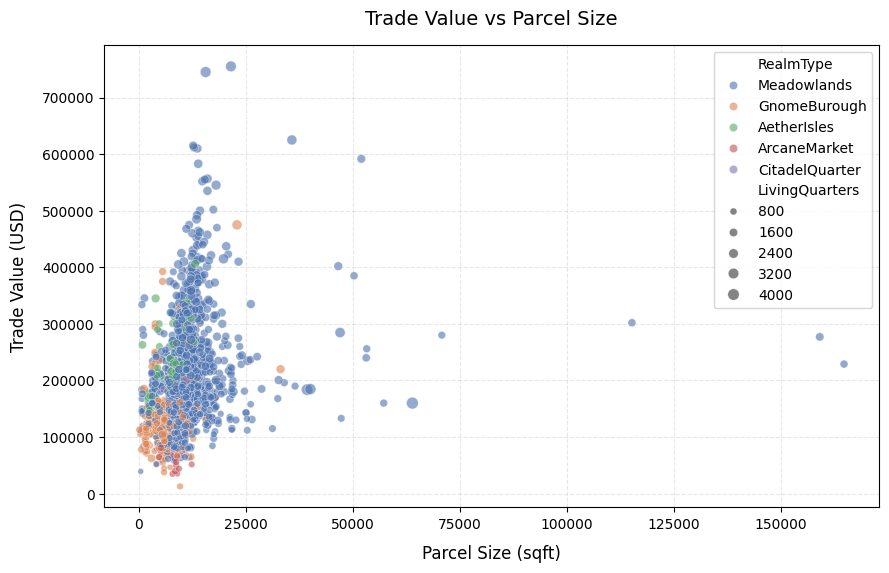

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfx, x='ParcelSize', y='TradeValue', hue='RealmType', size='LivingQuarters', alpha=0.6, palette='deep', legend='brief')
plt.xlabel('Parcel Size (sqft)', fontsize=12, labelpad=10)
plt.ylabel('Trade Value (USD)', fontsize=12, labelpad=10)
plt.title('Trade Value vs Parcel Size', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

数据拆分、基准模型和误差计算是建模的基础步骤。<br><br>

1.数据拆分：<br>
训练集 (X_train, y_train)：用于训练模型，模型会从这些数据中学习模式和规律（比如房价如何跟面积相关）。<br>
测试集 (X_test, y_test)：用于评估模型的表现，看看模型在没见过的数据上能否做出准确的预测。<br>
- X（特征，features）：用来训练模型的数据（包含多个特征），在本数据集中包括 DI, RealmType, Enclave, LivingQuarters, ParcelSize, ParcelSizeUnit。
- y（目标变量，target variable）：希望模型预测的值，在本数据集中是 TradeValue。

2.基准模型：<br>
建立一个简单的预测方法（比如总是预测平均值），作为比较标准。后续模型必须比这个基准好，才算有意义。<br><br>

3.误差计算（MAE、RMSE）：<br>
衡量预测值和真实值的差距，判断模型好坏。

假设任务是预测房价（TradeValue），可以用其他列作为特征。

第一步：拆分数据<br>
使用train_test_split将数据分为训练集和测试集。

In [29]:
from sklearn.model_selection import train_test_split

dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2202 non-null   int64  
 1   TradeValue      2202 non-null   float64
 2   RealmType       2202 non-null   object 
 3   Enclave         2202 non-null   object 
 4   LivingQuarters  2202 non-null   float64
 5   ParcelSize      2202 non-null   float64
 6   ParcelSizeUnit  2202 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 137.6+ KB


In [30]:
# 提取目标变量（target）：TradeValue
target = dfx['TradeValue']

# 特征（feature）：其余所有列（DI, RealmType, Enclave, LivingQuarters, ParcelSize, ParcelSizeUnit）
feature = dfx[['RealmType','Enclave','LivingQuarters','ParcelSize','ParcelSizeUnit']]

# 拆分数据集：
# test_size=0.25：75%训练集，25%测试集；
# random_state=42：随机种子，即指定一个数字，确保每次运行都会得到完全相同的拆分结果。它可以是任意整数，甚至可以不写。（42是惯例，因为它是《银河系漫游指南》里的“终极答案”）

# 这个函数将X和y按行一起随机打乱，然后按比例分成四部分，比如75%行的DI、RealmType等作为特征训练集，25%行的TradeValue作为目标测试集。
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=42)

# 检查拆分结果
print('特征训练集样本数:', len(feature_train))
print('特征测试集样本数:', len(feature_test))
print('目标训练集样本数:', len(target_train))
print('目标测试集样本数:', len(target_test))

特征训练集样本数: 1651
特征测试集样本数: 551
目标训练集样本数: 1651
目标测试集样本数: 551


In [31]:
# feature_train和feature_test是DataFrame（多列数据），包含多个特征（列）；
# target_train和target_test是Series（单列数据），即目标（房价）。
print('特征训练集样本数据:\n', feature_train.head(3))
print('特征测试集样本数据:\n', feature_test.head(3))
print('目标训练集样本数据:\n', target_train.head(3))
print('目标测试集样本数据:\n', target_test.head(3))

特征训练集样本数据:
          RealmType     Enclave  LivingQuarters  ParcelSize ParcelSizeUnit
1982  GnomeBurough   wolfsbane           839.0      1890.0           sqft
1957  GnomeBurough  shadowmere           824.0      3675.0           sqft
2071   Meadowlands    sunspire           676.0      9675.0           sqft
特征测试集样本数据:
         RealmType      Enclave  LivingQuarters  ParcelSize ParcelSizeUnit
834   Meadowlands  dragonspire          1329.0     11072.0           sqft
622   Meadowlands    emberfall           746.0      8480.0           sqft
2265  Meadowlands   nighthaven           847.0     10464.0           sqft
目标训练集样本数据:
 1982     75190.0
1957    140000.0
2071    120000.0
Name: TradeValue, dtype: float64
目标测试集样本数据:
 834     145000.0
622     132500.0
2265    169000.0
Name: TradeValue, dtype: float64


第二步：建立基准模型

In [32]:
# 计算训练集TradeValue的平均值
value = target_train.mean()
print("基准模型预测值（平均值）:", value)

# 目标训练集和目标测试集的预测值，都用这个平均值
# [value] * len(target_train)：生成一个列表 pred_train/ pred_test，所有值都是这个均值，长度与目标训练集/测试集相等（*len()）。
pred_train = [value] * len(target_train)
pred_test = [value] * len(target_test)

基准模型预测值（平均值）: 180241.25257419745


In [33]:
print("pred_train的前三个值：",pred_train[:3])  # pred_train是一个有1651个元素的列表，列表里的所有元素都是180241.25这个值。
print("pred_test的前三个值：",pred_test[:3])  # pred_test是一个有551个元素的列表，列表里的所有元素都是180241.25这个值。

pred_train的前三个值： [180241.25257419745, 180241.25257419745, 180241.25257419745]
pred_test的前三个值： [180241.25257419745, 180241.25257419745, 180241.25257419745]


第三步：计算误差<br>
用MAE（均值绝对误差）和RMSE（均方根误差）评估基准模型的性能。

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
# 计算MAE:预测值和真实值的平均绝对差，单位与TradeValue相同（美元），反映平均误差。
mae_train = mean_absolute_error(target_train, pred_train)
mae_test = mean_absolute_error(target_test, pred_test)

# 计算RMSE:均方根误差，对大误差更敏感，也以美元为单位。
rmse_train = np.sqrt(mean_squared_error(target_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(target_test, pred_test))

# 输出结果
print(f"训练集 MAE: {mae_train:.2f}, 训练集 RMSE: {rmse_train:.2f}") # 训练集误差：衡量基准模型在已见过的数据上的表现。
print(f"测试集 MAE: {mae_test:.2f}, 测试集 RMSE: {rmse_test:.2f}") # 测试集误差：衡量在未知数据上的表现，是后续模型的比较基准。

训练集 MAE: 57431.91, 训练集 RMSE: 79414.58
测试集 MAE: 61735.47, 测试集 RMSE: 87510.28


现在需要合并两个数据集，需要考虑以哪列作为参考（使用 `on` 参数），以及哪些数据需要保留（设置 `how` 以选择合并方式）。<br><br>

合并方式有四种：<br>
inner: 只保留两边都有的数据，如果有一边没有对应的数据，则这一整行都舍弃。<br>
left: 左表全保留，右边表如果没有对应的数据，会自动补上NaN。<br>
right: 右表全保留，左边表如果没有对应的数据，会自动补上NaN。<br>
outer: 两边全部都保留，如果哪里缺少对应数据，会自动补上NaN。

In [66]:
df1 = pd.read_csv('../self-study/dataset/set13_it1_cleaned.csv',sep=',')
df2 = pd.read_csv('../self-study/dataset/set13_it2.csv',sep=',')

# 按DI合并
dfm = pd.merge(df1, df2, on='DI', how='inner')

# 保存到CSV文件
dfm.to_csv('../self-study/dataset/set13_it2_merged.csv', index=False)

In [67]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2223 non-null   int64  
 1   TradeValue           2223 non-null   float64
 2   RealmType            2223 non-null   object 
 3   Enclave              2223 non-null   object 
 4   LivingQuarters       2223 non-null   float64
 5   ParcelSize           2223 non-null   float64
 6   ParcelSizeUnit       2223 non-null   object 
 7   StructuralIntegrity  2223 non-null   int64  
 8   ExteriorCharm        2223 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 156.4+ KB


In [68]:
dfm.head(3)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm
0,0,147000.0,Meadowlands,brightforge,766.0,9069.0,sqft,6,Common
1,1,98000.0,GnomeBurough,petalbridge,1033.0,4571.0,sqft,5,Common
2,2,325624.0,Meadowlands,silverglen,1662.0,10562.0,sqft,5,Gleaming
